# Feature importance

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import log_loss,accuracy_score 
from scipy.stats import weightedtau
import seaborn as sns
import sys

In [146]:
cont = pd.read_csv("weighted_cont.csv", index_col=0, parse_dates=True)
test = pd.read_csv("test.csv", index_col=0, parse_dates=True)

In [147]:
cont.sort_index(inplace=True)

In [148]:
cont['random'] = np.random.uniform(size=len(cont))
cont['target'] = list(map(lambda x: 1 if x>0.01 else 0, cont['target']))

In [149]:
clf=RandomForestClassifier(n_estimators=1000, 
                           max_features=1, 
                           criterion='entropy', 
                           oob_score=True, 
                           class_weight='balanced', 
                           max_samples=1)


In [216]:
clf = RandomForestClassifier(n_estimators=100,
                             max_features=2,
                             oob_score=True)


In [153]:
cont = cont.astype('float32', copy=True, errors='ignore')
cont = cont.astype('int32', copy=True, errors='ignore')
cont['random'] = np.random.uniform(size=len(cont)).astype('float32')
cont.dropna(inplace=True)
cont

,trades,pret,target,w,td,wd,random
timestamp,,,,,,,
2018-09-01 20:00:00,neo,0.020812,0,0.155376,0.500006,0.077689,0.506149
2018-09-01 22:00:00,etc,-0.004364,0,0.102026,0.500009,0.051014,0.600296
2018-09-02 00:00:00,bnb,0.005295,1,0.353535,0.500022,0.176775,0.725516
2018-09-02 02:00:00,eth,-0.005151,0,0.280347,0.500032,0.140182,0.255348
2018-09-02 04:00:00,icx,0.038464,1,0.382965,0.500046,0.191500,0.418172
...,...,...,...,...,...,...,...
2021-11-11 02:00:00,chr,0.193714,0,1.997676,0.999582,1.996841,0.826634
2021-11-11 04:00:00,mask,0.080998,1,0.898208,0.999614,0.897862,0.111266
2021-11-11 06:00:00,lrc,0.086893,1,1.313552,0.999661,1.313107,0.375872


In [217]:
fit=clf.fit(X=cont.drop(['target', 'w', 'wd', 'td', 'trades'], axis=1),
            y=cont['target'],sample_weight=cont['wd'].values) 


In [218]:
oob=fit.oob_score_
oob

0.561644816963966

In [221]:
t_ = test.drop(['target', 'trades'], axis=1)
t_['random'] = np.random.uniform(size=len(t_)).astype('float32')

In [196]:
t_['target'] = list(map(lambda x: 1 if x>0.01 else 0, t_['target']))

KeyError: 'target'

In [222]:
pred = fit.predict(t_)

In [223]:
sum(pred)

570

In [224]:
clf.feature_importances_

array([0.51431944, 0.48568056])

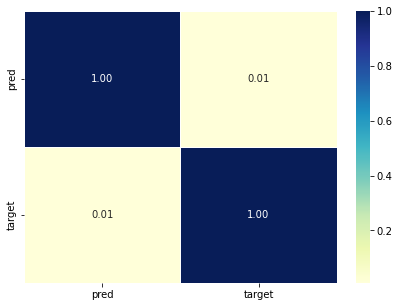

In [225]:

d = pd.DataFrame({"pred":pred, "target":test['target']})
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [ ]:

imp=featImpMDI(fit,featNames=trnsX.columns) 
oos=cvScore(clf,X=trnsX,y=cont['target'],cv=cv,sample_weight=cont['wd'],
            t1=cont['t1'],pctEmbargo=pctEmbargo,scoring=scoring).mean() 